In [1]:
from project1_tictactoe_classes import *

In [2]:
### EXPERIMENT 1: SANITY CHECK ###
# agents choose completely randomly --> x should win most of the time
x = Agent('x', random_frequency = 1, learning_rate = 0)
o = Agent('o', random_frequency = 1, learning_rate = 0)
game = Game({'x':x, 'o':o})
results = game.track_performace(training_batch_size=0,num_training_batches=5,estimation_batch_size=500)
results

,prob_draw,prob_o_wins,prob_x_wins,tot_games_trained
0,0.222,0.246,0.532,0
1,0.266,0.208,0.526,0
2,0.222,0.274,0.504,0
3,0.254,0.244,0.502,0
4,0.244,0.238,0.518,0


locating pair  1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 
playing pair  1... 2... 3... 4... 5... 6... 7... 8... 9... 10...

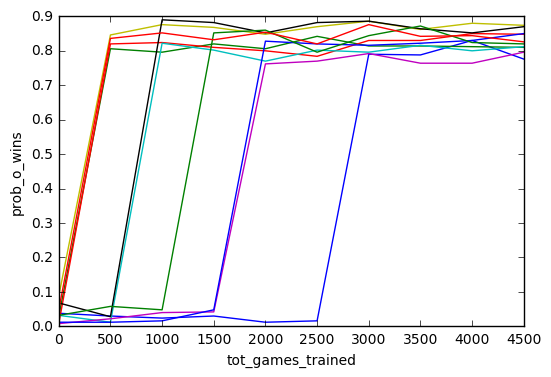

In [4]:
### EXPERIMENT 2: IMPROVING PERFORMANCE ###

# find N pairs of players x and o so that o's winning probability is no more than 10%
N = 10
game_list = []
for i in range(N):
    if i==0:
        print 'locating pair ',
    print str(i+1)+'...',
    x = Agent('x', random_frequency = 0, learning_rate = 0)
    o = Agent('o', random_frequency = 0.1, learning_rate = 0.1)
    game = Game({'x':x, 'o':o})
    results = game.track_performace(training_batch_size=0,num_training_batches=1,estimation_batch_size=500)
    while results['prob_o_wins'][0] > 0.1:
        x = Agent('x', random_frequency = 0, learning_rate = 0)
        o = Agent('o', random_frequency = 0.1, learning_rate = 0.1)
        game = Game({'x':x, 'o':o})
        results = game.track_performace(training_batch_size=0,num_training_batches=1,estimation_batch_size=500)
    game_list.append(game)
    
# play these pairs
results_list = []
for i in range(N):
    if i==0:
        print '\nplaying pair ',
    print str(i+1)+'...',
    results_list.append(game_list[i].track_performace(training_batch_size=500,num_training_batches=10,estimation_batch_size=500))

# visualize how quickly o improves in all pairs
import matplotlib.pyplot as plt
for i in range(N):
    results_list[i].set_index('tot_games_trained')['prob_o_wins'].plot()
plt.ylabel('prob_o_wins')
plt.show()